In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob
import random

np.random.seed(0)
random.seed(0)

# Create parameters

In [2]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 50
memory = [2, 20, 30, max_iter]
memory_bounds = {}
for m in memory:
    print(f"memory = {m}")
    prob.solve(rel_gap= 10**(-10), abs_gap=10**(-10), max_iter=max_iter, memory=m, minorant_update='drop_constr', print_freq=10)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

memory = 2


/Users/fangzhaozhang/miniconda3/envs/hw4/lib/python3.8/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=242.43469819914174, L=-1139391.8368440405, U=-4680.4824672609375, L0=-1139391.8368440405
k=10, rel_gap=0.0654699844823378, L=-5613.820215442633, U=-5268.867539398706, L0=-12737.65192768509
k=20, rel_gap=0.0654699844823378, L=-5613.820215442633, U=-5268.867539398706, L0=-10308.291901061713
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS
proxmin ECOS fail again, switch to OSQP
proxmin ECOS fail, increase #iter in ECOS

# Centralized solution

In [5]:
h_cvx = ob.cvx_resource_allocation(params=params, R=R)[0]
print(f"{h_cvx=}")

h_cvx=-5470.798374529231


# Plot

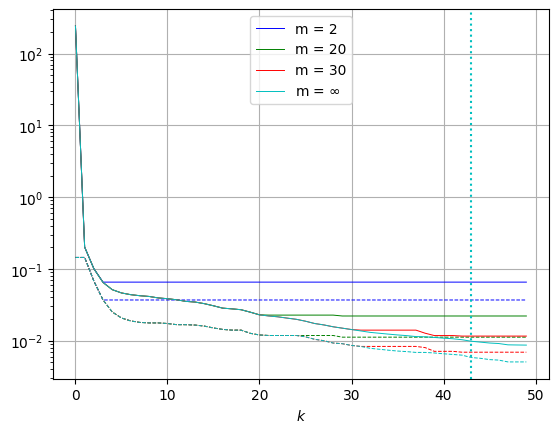

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx, filename='ra_fin_memory_drop.pdf')